In [5]:
import numpy as np
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
%matplotlib inline

In [3]:
X, Y = load_planar_dataset()
X.shape

(2, 400)

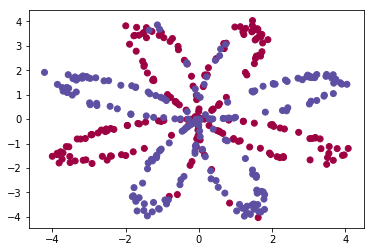

In [14]:
plt.scatter(X[0, :], X[1, :], c=Y[0], cmap=plt.cm.Spectral)
plt.show()

----

# 1. Logistic Regression

In [16]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [47]:
yy.ravel()

array([-5.035124, -5.035124, -5.035124, ...,  5.034876,  5.034876,
        5.034876])

In [46]:
np.c_[xx.ravel(), yy.ravel(), yy.ravel()]

array([[-5.21189811, -5.035124  , -5.035124  ],
       [-5.20189811, -5.035124  , -5.035124  ],
       [-5.19189811, -5.035124  , -5.035124  ],
       ...,
       [ 5.05810189,  5.034876  ,  5.034876  ],
       [ 5.06810189,  5.034876  ,  5.034876  ],
       [ 5.07810189,  5.034876  ,  5.034876  ]])

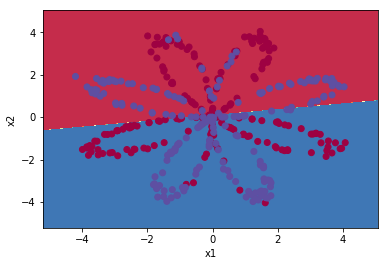

In [87]:
x1_min, x1_max = X[0, :].min() - 1, X[0, :].max() + 1
x2_min, x2_max = X[1, :].min() - 1, X[1, :].max() + 1
step = 0.01

mesh_x1 = np.arange(x1_min, x1_max, step)
mesh_x2 = np.arange(x1_min, x2_max, step)
xx1, xx2 = np.meshgrid(mesh_x1, mesh_x2)
plot_x1x2 = np.c_[xx1.ravel(), xx2.ravel()]

Z = clf.predict(plot_x1x2)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, cmap=plt.cm.Spectral)
plt.xlabel('x1')
plt.ylabel('x2')

plt.scatter(X[0, :], X[1, :], c=Y[0], cmap=plt.cm.Spectral)
plt.show()

In [86]:
# np.dot(Y[0], pred): 1 = 1 정답
# np.dot(1 - Y[0], 1 - pred): 0 = 0 정답
pred = clf.predict(X.T)
NumOfAns = np.dot(Y[0], pred) + np.dot(1 - Y[0], 1 - pred)
accuracy = NumOfAns / Y[0].size * 100
print("accuracy: ", accuracy, "%")

accuracy:  47.0 %


# 2. Neural Network Model
## Dimension
- W: (자기 feature =자기 unit) * (앞레이어 feature = 앞레이어 unit)

### 1) set structure

In [114]:
def layer_size(X, Y):
    # n_h: Num of Unit of HiddenLayer
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    print("num of feature: {}, num of unit of hidden Layer: {}, out put: {}".\
         format(n_x, n_h, n_y))
    return (n_x, n_h, n_y)

In [142]:
n_x, n_h, n_y = layer_size(X, Y)

num of feature: 2, num of unit of hidden Layer: 4, out put: 1


### 2) initialize params

In [134]:
def initialize_params(n_x, n_h, n_y):
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))

    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    params = {"W1": W1,
             "b1": b1,
             "W2": W2,
             "b2": b2}
    
    return params

In [143]:
params = initialize_params(n_x, n_h, n_y)
params

{'W1': array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]), 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]), 'W2': array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]), 'b2': array([[0.]])}

### 3) loop: forward propagation

In [144]:
def forward_propagation(X, params):
    
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert (A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
            "A1": A1,
            "Z2": Z2,
            "A2": A2}
    
    return A2, cache

In [148]:
A2, cache = forward_propagation(X, params)
A2.shape

(1, 400)

### 4) Cost

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} $$


In [167]:
def compute_cost(A2, Y):
    m = Y.shape[1] # Num of sample
    
    logprob = np.multiply(np.log(A2), Y) + np.multiply((1- Y), np.log(1 - A2))
    loss = - logprob
    cost = 1/m * np.sum(loss)
    
    cost = np.squeeze(cost) # makes sure cost is the dimension we expect. 
                            # E.g., turns [[17]] into 17 
    
    assert(isinstance(cost, float))
    
    return cost

In [169]:
compute_cost(A2, Y)

0.6930480201239823

### 5) loop: backward propagation

In [155]:
def backward_propagation(params, cache, X, Y):
    m = X.shape[1]
    
    W1 = params['W1']
    W2 = params['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    d_Z2 = A2 - Y
    d_W2 = (1 / m) * np.dot(d_Z2, A1.T)
    d_b2 = (1 / m) * np.sum(d_Z2)
    
    d_Z1 = np.multiply(np.dot(W2.T, d_Z2), 1 - np.power(A1, 2))
    d_W1 = (1 / m) * np.dot(d_Z1, X.T)
    d_b1 = (1 / m) * np.sum(d_Z1, axis=1, keepdims=True)
    
    grads = {"d_W1": d_W1,
            "d_b1": d_b1,
            "d_W2": d_W2,
            "d_b2": d_b2,}
    
    return grads

In [158]:
grads = backward_propagation(params, cache, X, Y)
grads

{'d_W1': array([[ 0.00023606, -0.00207914],
        [ 0.0002091 , -0.00178201],
        [-0.00012051,  0.0010843 ],
        [-0.00051496,  0.00449162]]), 'd_b1': array([[ 1.06848030e-07],
        [-9.70907252e-07],
        [-7.20012658e-08],
        [ 3.03048452e-07]]), 'd_W2': array([[-1.75478714e-05,  3.70240274e-03, -1.25686736e-03,
         -2.55725650e-03]]), 'd_b2': -1.0892314028936311e-05}

## 6) update_params

In [161]:
def update_params(params, grads, learning_rate=1.2):
    
    # before
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    d_W2 = grads['d_W2']
    d_b2 = grads['d_b2']
    d_W1 = grads['d_W1']
    d_b1 = grads['d_b1']
    
    # after
    W2 = W2 - learning_rate * d_W2
    b2 = b2 - learning_rate * d_b2
    W1 = W1 - learning_rate * d_W1
    b1 = b1 - learning_rate * d_b1
    
    params = {"W1": W1,
             "b1": b1,
             "W2": W2,
             "b2": b2}
    
    return params

In [162]:
update_params(params, grads)

{'W1': array([[-0.00445085,  0.0019323 ],
        [-0.02161288,  0.01854112],
        [-0.01778975, -0.00971864],
        [ 0.00564676, -0.01784282]]), 'b1': array([[-1.28217636e-07],
        [ 1.16508870e-06],
        [ 8.64015190e-08],
        [-3.63658142e-07]]), 'W2': array([[-0.01055846, -0.01353296,  0.00702278,  0.02599079]]), 'b2': array([[1.30707768e-05]])}

## 7) Build Model
- forward propagation: get $Z, \sigma(Z), \text{ and cost}$
- backward propagation: get **dW, db** and update

In [182]:
def nn_model(X, Y, n_h, num_iteration=10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_size(X, Y)[0]
    n_y = layer_size(X, Y)[2]
    
    params = initialize_params(n_x, n_h, n_y)
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    # gradient descent
    for i in range(0, num_iteration):
        A2, cache = forward_propagation(X, params)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(params, cache, X, Y)
        params = update_params(params, grads)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
    
    return params    

In [183]:
nn_model(X, Y, 4, print_cost=True)

num of feature: 2, num of unit of hidden Layer: 4, out put: 1
num of feature: 2, num of unit of hidden Layer: 4, out put: 1
Cost after iteration 0: 0.6930480201239823
Cost after iteration 1000: 0.28808329356901835
Cost after iteration 2000: 0.25438549407324496
Cost after iteration 3000: 0.23386415038952202
Cost after iteration 4000: 0.22679248744854008
Cost after iteration 5000: 0.22264427549299018
Cost after iteration 6000: 0.21973140404281316
Cost after iteration 7000: 0.21750365405131297
Cost after iteration 8000: 0.219454195679659
Cost after iteration 9000: 0.2186068867371229


{'W1': array([[  0.1473682 ,  -9.68436878],
        [-11.13331529,   3.33831923],
        [-11.46609646, -13.4187675 ],
        [  9.25245064, -10.20085213]]), 'b1': array([[-0.09915472],
        [-0.39062191],
        [-0.03591516],
        [ 0.09184728]]), 'W2': array([[-11.98420831,   3.44408393,   6.15377131,  10.52121461]]), 'b2': array([[-0.05273748]])}

## 8) prediction
$y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases} 1 & \text{if}\ activation > 0.5 \\ 0 & \text{otherwise} \end{cases}$

In [165]:
def predict(params, X):
    A2, cache = forward_propagation(X, params)
    pred = np.round(A2)
    
    return pred

In [166]:
predict(params, X)

array([[0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
        0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
        1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 

## eg.

In [189]:
X.shape

(2, 400)

num of feature: 2, num of unit of hidden Layer: 4, out put: 1
num of feature: 2, num of unit of hidden Layer: 4, out put: 1
Cost after iteration 0: 0.6930480201239823
Cost after iteration 1000: 0.28808329356901835
Cost after iteration 2000: 0.25438549407324496
Cost after iteration 3000: 0.23386415038952202
Cost after iteration 4000: 0.22679248744854008
Cost after iteration 5000: 0.22264427549299018
Cost after iteration 6000: 0.21973140404281316
Cost after iteration 7000: 0.21750365405131297
Cost after iteration 8000: 0.219454195679659
Cost after iteration 9000: 0.2186068867371229


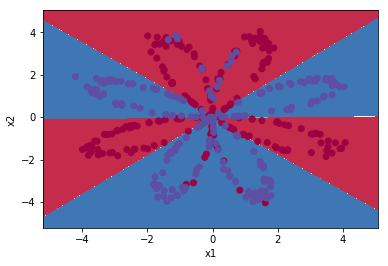

In [185]:
# Build model
params = nn_model(X, Y, n_h=4, num_iteration=10000, print_cost=True)

# Plotting
x1_min, x1_max = X[0, :].min() - 1, X[0, :].max() + 1
x2_min, x2_max = X[1, :].min() - 1, X[1, :].max() + 1
step = 0.01

mesh_x1 = np.arange(x1_min, x1_max, step)
mesh_x2 = np.arange(x1_min, x2_max, step)
xx1, xx2 = np.meshgrid(mesh_x1, mesh_x2)
plot_x1x2 = np.c_[xx1.ravel(), xx2.ravel()]

Z = predict(params, plot_x1x2.T)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, cmap=plt.cm.Spectral)
plt.xlabel('x1')
plt.ylabel('x2')

plt.scatter(X[0, :], X[1, :], c=Y[0], cmap=plt.cm.Spectral)
plt.show()

num of feature: 2, num of unit of hidden Layer: 4, out put: 1
num of feature: 2, num of unit of hidden Layer: 4, out put: 1
Accuracy for 1 hidden units: 67.5 %
num of feature: 2, num of unit of hidden Layer: 4, out put: 1
num of feature: 2, num of unit of hidden Layer: 4, out put: 1
Accuracy for 2 hidden units: 67.25 %
num of feature: 2, num of unit of hidden Layer: 4, out put: 1
num of feature: 2, num of unit of hidden Layer: 4, out put: 1
Accuracy for 3 hidden units: 90.75 %
num of feature: 2, num of unit of hidden Layer: 4, out put: 1
num of feature: 2, num of unit of hidden Layer: 4, out put: 1
Accuracy for 4 hidden units: 90.5 %
num of feature: 2, num of unit of hidden Layer: 4, out put: 1
num of feature: 2, num of unit of hidden Layer: 4, out put: 1
Accuracy for 5 hidden units: 91.25 %
num of feature: 2, num of unit of hidden Layer: 4, out put: 1
num of feature: 2, num of unit of hidden Layer: 4, out put: 1
Accuracy for 40 hidden units: 90.75 %
num of feature: 2, num of unit of h

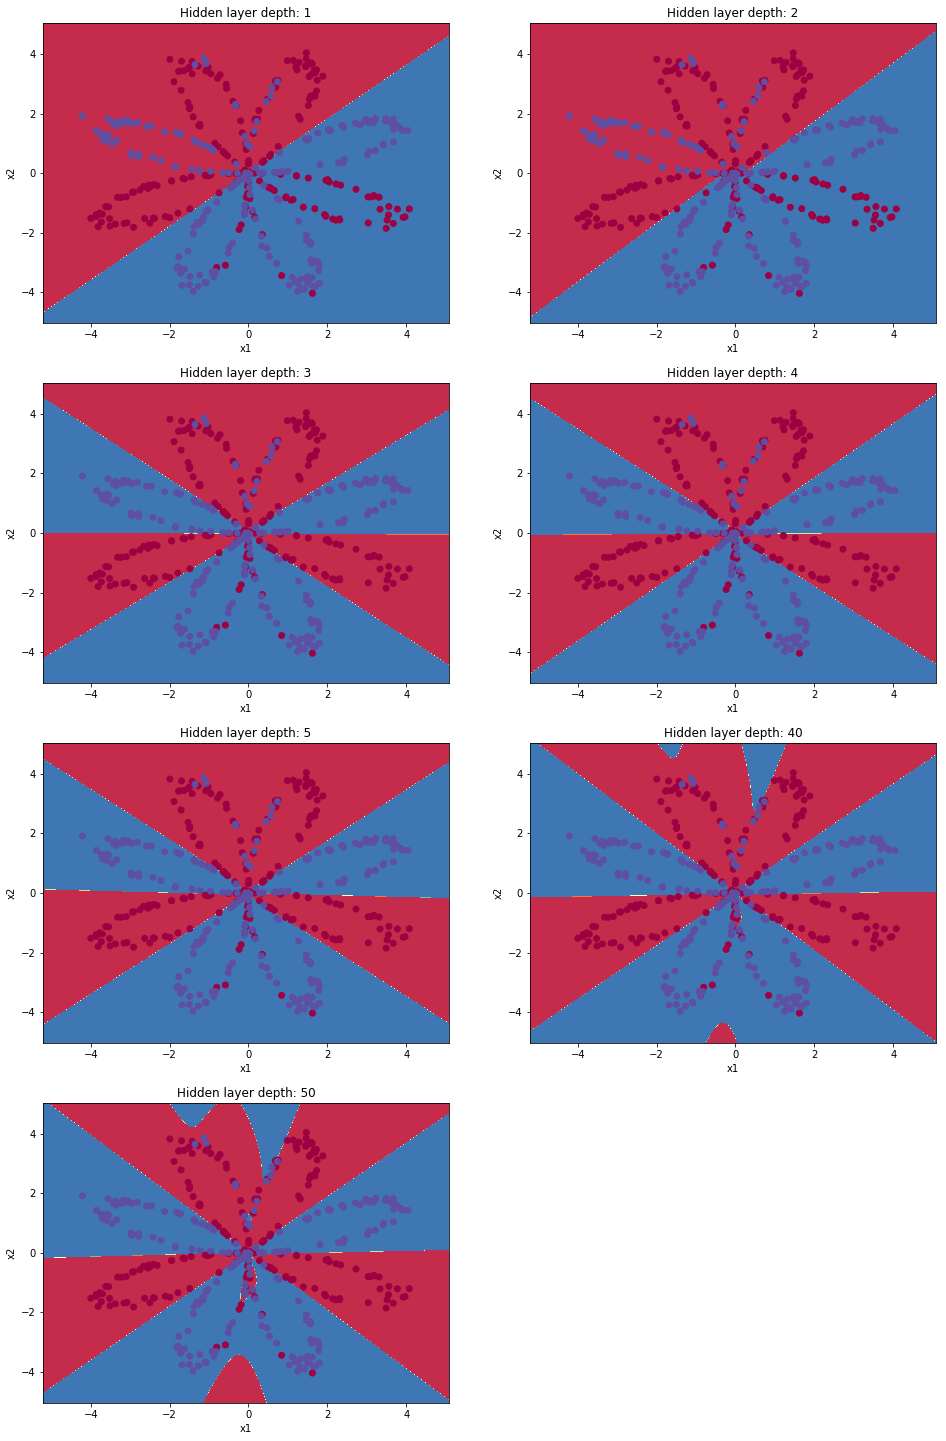

In [193]:
plt.figure(figsize=(16, 32))
hidden_layer_depth = [1, 2, 3, 4, 5, 40 ,50]

for i, n_h in enumerate(hidden_layer_depth):
    plt.subplot(5, 2, i+1)
    plt.title("Hidden layer depth: {}".format(n_h))
    params = nn_model(X, Y, n_h, num_iteration=5000)
    plot_decision_boundary(lambda x: predict(params, x.T), X, Y)
    pred = predict(params, X)
    
    ans = np.dot(Y, pred.T) + np.dot(1 - Y, 1 - pred.T)
    accuracy = float(ans) / float(Y.size) * 100
    print("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

- 질문
    - prediction에서 왜 Transpose?

reference
- https://github.com/Kulbear/deep-learning-coursera